# Making a half-adder with Qiskit

The half adder is the building block of a general addition operation. It needs to be able to do the binary operations:

0 + 0 = 00 <br>
0 + 1 = 01 <br>
1 + 0 = 01 <br>
1 + 1 = 10 <br>

To implement this, we first start by using CNOT gates to carry out an effective XOR operation on our two control bits q0 and q1, storing the result in a target bit q2

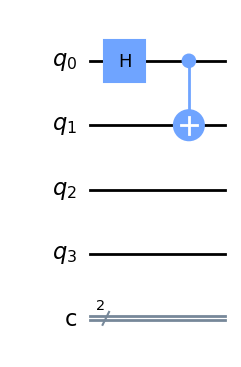

In [1]:
# Create quantum circuit with 2 qubits and 2 classical bits
from qiskit import QuantumCircuit
qc = QuantumCircuit(4, 2)

# qc.x([1])  # Set one, both, or neither of the control qubits to 1
qc.cx(0,2)  # CNOT controlled by qubit 0 and targeting qubit 2
qc.cx(1,2)  # CNOT controlled by qubit 1 and targeting qubit 2
qc.measure([2, 3], [0, 1])

qc.draw(output='mpl')

In [27]:
# Set up simulator
from qiskit.providers.aer import AerSimulator
sim = AerSimulator()

job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())

Result:  {'00': 1024}


We see that the two CNOT gates act as an XOR gate. Each application of the CNOT gate returns 1 if and only if one of the control and target qubits is 1, else 0.

0 + 0 = 00 <br>
0 + 1 = 01 <br>
1 + 0 = 01 <br>
1 + 1 = 00

This is close to what we want, but 1 + 1 = 10 not 00.

To fix this, we ask the computer to check if both of the control cubits are in state 1. If they are, we flip the first 'digit' from 0 to one. This is just performing a Boolean AND operation; we do this by applying the Toffoli gate, controlled by both q0 and q1, and targeting q3.

Thus, the least-significant digit (2^0) of the output is encoded in the state of the target qubit q2, and the next most significant digit (2^1) in the state of q3.

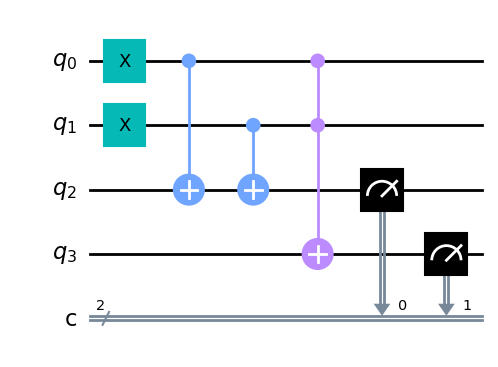

In [30]:
qc.clear()

qc.x([0, 1])       # Set one, both, or neither of the control qubits to 
qc.cx(0,2)       # CNOT controlled by qubit 0 and targeting qubit 2
qc.cx(1,2)       # CNOT controlled by qubit 1 and targeting qubit 2
qc.ccx(0, 1, 3)  # Toffoli gate controlled by qubits 0, 1 and targeting qubit 3

qc.measure([2, 3], [0, 1])

qc.draw(output='mpl')

In [32]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())

Result:  {'10': 1024}


Now we have added the Toffoli gate, we have a working half adder! We can layer many of these to add arbitrary numbers